In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [24]:
Y_train.shape

(60000,)

In [6]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

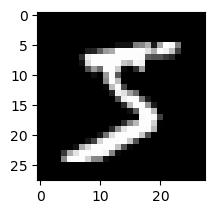

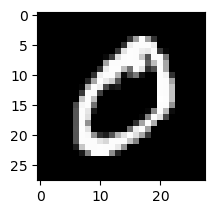

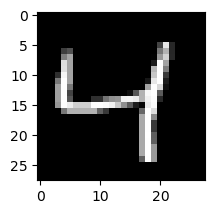

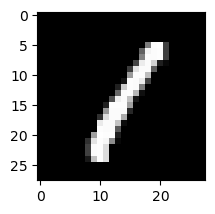

In [50]:
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [14]:
X_train = X_train.reshape(60000, 28, 28, -1)
X_test = X_test.reshape(10000, 28, 28, -1)

In [26]:
Y_train = Y_train.reshape(60000, -1)
Y_test = Y_test.reshape(10000, -1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Normalization, Conv2D, MaxPooling2D 
normalization_layer = Normalization()
normalization_layer.adapt(X_train)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.1685 - accuracy: 0.9483 - val_loss: 0.0666 - val_accuracy: 0.9803
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0532 - val_accuracy: 0.9841
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0481 - val_accuracy: 0.9860
Epoch 4/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 5/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0464 - val_accuracy: 0.9886
Epoch 7/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0414 -

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [34]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0187 - accuracy: 0.9947


[0.018745295703411102, 0.9946833252906799]

In [35]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0425 - accuracy: 0.9888


[0.042516667395830154, 0.9887999892234802]

In [38]:
model.save('C:\\Users\\ELITE\\Downloads\\archive (6)\\mnist.model')

INFO:tensorflow:Assets written to: C:\Users\ELITE\Downloads\archive (6)\mnist.model\assets


INFO:tensorflow:Assets written to: C:\Users\ELITE\Downloads\archive (6)\mnist.model\assets


In [39]:
predictions = model.predict(X_test )

313/313 [==============================] - 2s 7ms/step


In [40]:
predicted_classes = predictions.argmax(axis=-1)

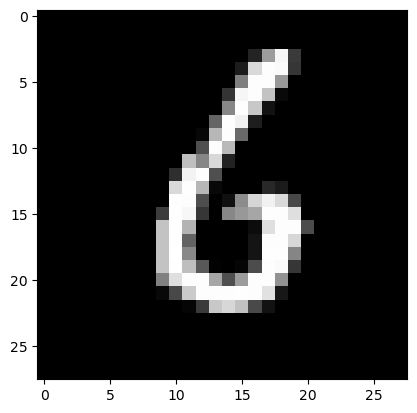

In [47]:
plt.imshow(X_test[50], cmap = plt.get_cmap('gray'))

In [49]:
print("The prediction is : ", np.argmax(predictions[50]))

The prediction is :  6
